In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #limiting float outputs to 3 decimal points
from subprocess import check_output


The details of the project and the data can be downloaded from here https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("The train data set has {0} columns and {1} rows".format(train.shape[0],train.shape[1]))
print("The test data set has {0} columns and {1} rows".format(test.shape[0],test.shape[1]))

train_Id = train['Id']
test_Id = test['Id']
#the ID column is not required so remove it
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data set has {0} columns and {1} rows".format(train.shape[0],train.shape[1]))
print("The test data set has {0} columns and {1} rows".format(test.shape[0],test.shape[1]))

The train data set has 1460 columns and 81 rows
The test data set has 1459 columns and 80 rows

The train data set has 1460 columns and 80 rows
The test data set has 1459 columns and 79 rows


# Data Visualization

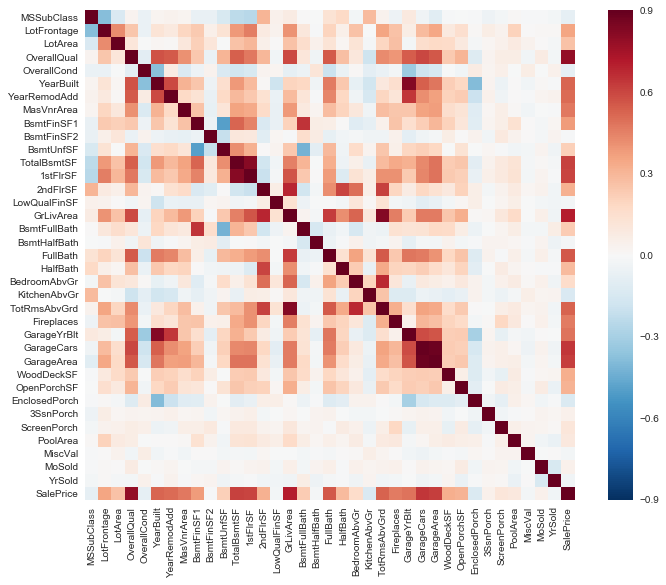

In [3]:
# checking how the varibales are strongly correlated with the traget variable i.e SalePrice
corrMatrix = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrMatrix, vmax = 0.9, square =True)

In [4]:
#numeric features
numeric_features = [ x for x in train.columns if train.dtypes[x] != 'object']
print(numeric_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [5]:
print(corrMatrix['SalePrice'].sort_values(ascending= False)[:10])

SalePrice      1.000
OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
Name: SalePrice, dtype: float64


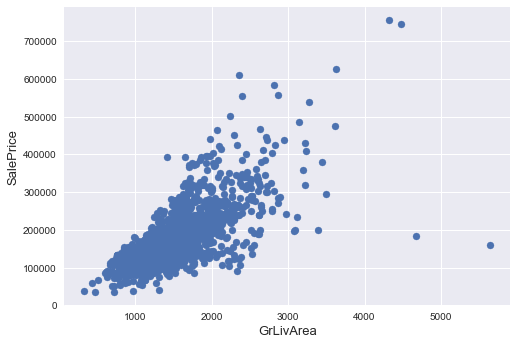

In [6]:
#we will try to remove the outliers from the variables having high coreelation with target_varibale(SalePrice)

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

In [7]:
# Removing the OutLiers
train = train.drop(train[(train['SalePrice']<200000) & (train['GrLivArea']> 4000)].index)

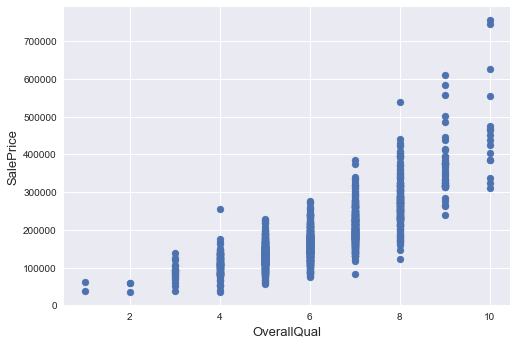

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('OverallQual', fontsize = 13)
plt.show()

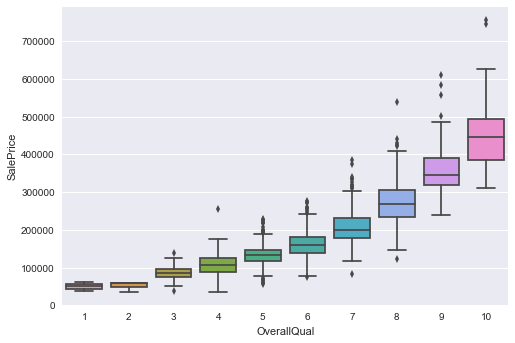

In [9]:
sns.boxplot(x ='OverallQual', y = 'SalePrice', data = train)

In [10]:
train[(train['SalePrice']>200000) & (train['OverallQual']== 4)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
457,20,RL,nan,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000


In [11]:
train[(train['SalePrice']<150000) & (train['OverallQual']== 8)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1324,20,RL,75.000,9986,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000
1349,70,RM,50.000,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000


In [12]:
train = train.drop(train[(train['SalePrice']>500000) & (train['OverallQual']==8)].index)
train = train.drop(train[(train['SalePrice']==122000) & (train['OverallQual']==8)].index)
train = train.drop(train[(train['SalePrice']>200000) & (train['OverallQual']==4)].index)
train = train.drop(train[(train['SalePrice']<100000) & (train['OverallQual']==7)].index)

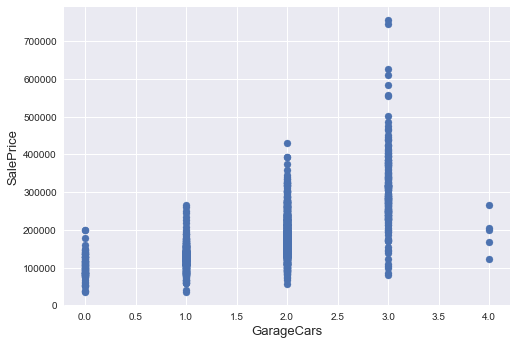

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GarageCars', fontsize = 13)
plt.show()

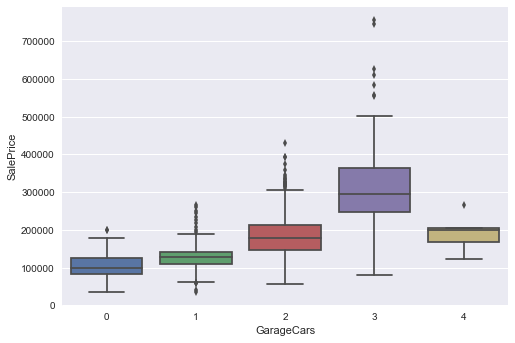

In [14]:
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = train)

In [15]:
train['GarageCars'].value_counts()

2    821
1    369
3    179
0     80
4      5
Name: GarageCars, dtype: int64

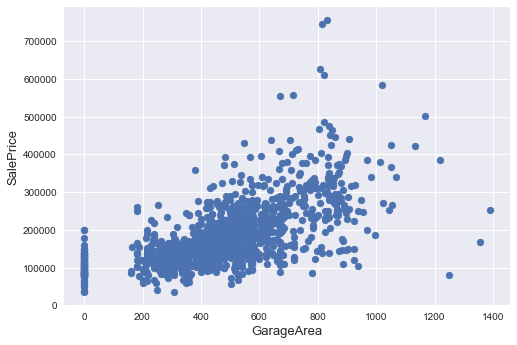

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GarageArea', fontsize = 13)
plt.show()

In [17]:
train = train.drop(train[(train['SalePrice']<300000) & (train['GarageArea']>1200)].index)

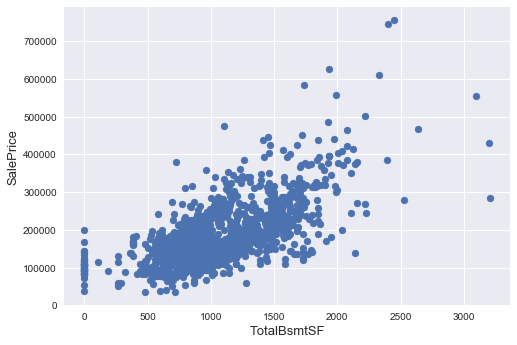

In [18]:
fig,ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('TotalBsmtSF', fontsize = 13)
plt.show()

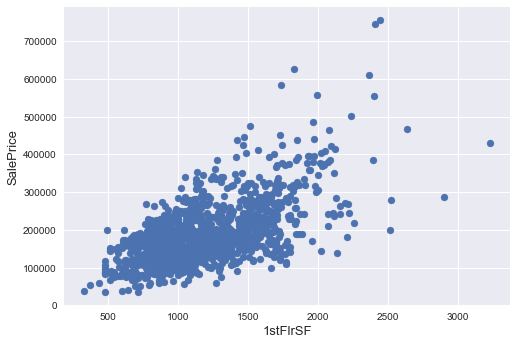

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = train['1stFlrSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('1stFlrSF', fontsize = 13)
plt.show()

# Target Variable


 mu = 180771.47 and sigma = 78956.57



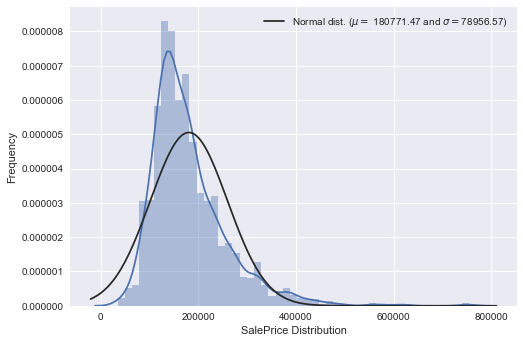

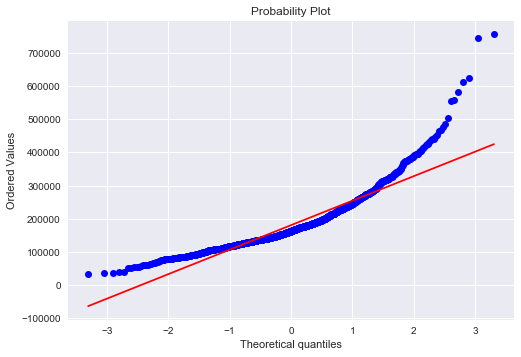

In [20]:
sns.distplot(train['SalePrice'], fit = norm)

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.xlabel('SalePrice Distribution')

#also get the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40


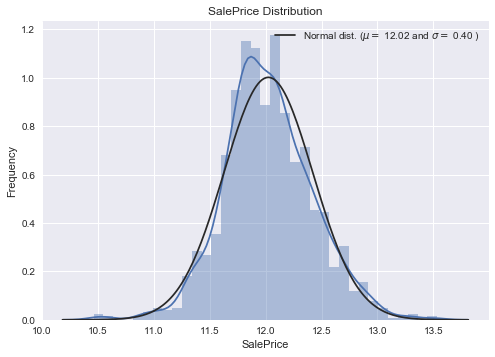

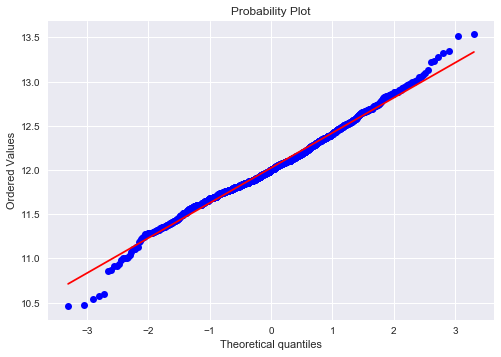

In [21]:
#We could see that the observations are right skewed, we need to make it more normally distributed
#we will use numpy function log1p that applies log(1+x) to all the elements of the column
SalePrice = train['SalePrice']
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'], fit = norm)

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
#plt.xlabel('SalePrice')
plt.title('SalePrice Distribution')

#Get the QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [22]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
alldata = pd.concat((train, test)).reset_index(drop=True)
alldata.drop(['SalePrice'], axis=1, inplace=True)
print("alldata size is : {}".format(alldata.shape))

alldata size is : (2910, 79)


In [23]:
#getting the missing values percentage for each column
miss = (alldata.isnull().sum()/len(alldata)) * 100
miss = miss[miss.values>0]
miss = miss.sort_values(ascending = False)
miss = pd.DataFrame({'Missing Ratio': miss})
miss

,Missing Ratio
PoolQC,99.691
MiscFeature,96.426
Alley,93.230
Fence,80.378
FireplaceQu,48.729
LotFrontage,16.632
GarageQual,5.430
GarageCond,5.430
GarageFinish,5.430
GarageYrBlt,5.430


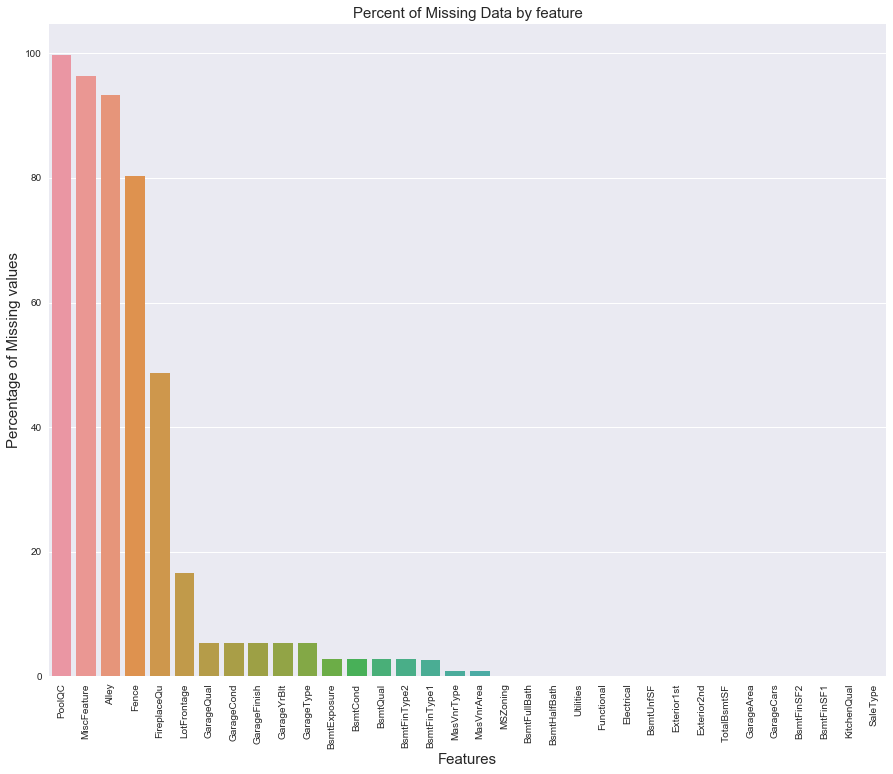

In [24]:
f, ax  = plt.subplots(figsize=(15,12))
plt.xticks(rotation = '90')
sns.barplot(x = miss.index, y ='Missing Ratio', data = miss)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percentage of Missing values', fontsize = 15)
plt.title('Percent of Missing Data by feature', fontsize = 15)

### Imputing Missing Values

In [25]:
# Data description of PoolQC tells that NA means "NO Pool". This make sense as majority of house would not have pool in general
alldata['PoolQC'] = alldata['PoolQC'].fillna('None')
alldata['MiscFeature'] = alldata['MiscFeature'].fillna('None') # data description says NA means None
alldata['Alley'] = alldata['Alley'].fillna('None')
alldata['Fence'] = alldata['Fence'].fillna('None')
alldata['FireplaceQu'] = alldata['FireplaceQu'].fillna('None')

In [26]:
#Bi-furcating the categorical column and numerical column having missing value
num_col = [x for x in miss.index if train.dtypes[x] != 'object']
cat_col = [x for x in miss.index if train.dtypes[x] == 'object']
print(num_col)
print(cat_col)

['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFinSF2', 'BsmtFinSF1']
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']


##### Imputing missing values for categorical variables

In [27]:
for x in ['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']:
    alldata[x] = alldata[x].fillna('None')

In [28]:
for x in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    alldata[x] = alldata[x].fillna('None')

In [29]:
alldata['MasVnrType'].value_counts(dropna = False)

None       1739
BrkFace     876
Stone       246
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [30]:
alldata['MasVnrType'] = alldata['MasVnrType'].fillna('None')

In [31]:
alldata['Utilities'].value_counts(dropna = False)

AllPub    2907
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
alldata = alldata.drop(['Utilities'], axis=1)

In [33]:
for x in ['Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType','Electrical','Functional','MSZoning','MasVnrType']:
    print(alldata[x].value_counts(dropna=False))

VinylSd    1024
MetalSd     447
HdBoard     442
Wd Sdng     411
Plywood     219
CemntBd     124
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64
VinylSd    1013
MetalSd     444
HdBoard     406
Wd Sdng     391
Plywood     268
CmentBd     125
Wd Shng      80
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64
TA     1488
Gd     1150
Ex      201
Fa       70
NaN       1
Name: KitchenQual, dtype: int64
WD       2520
New       236
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64
SBrkr    2662
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64
Typ     2710
Min2      70
Min1  

In [34]:
for x in ['Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType','Electrical','Functional','MSZoning']:
    alldata[x] = alldata[x].fillna(alldata[x].mode()[0])

#### Imputing missing values for numerical variables

In [35]:
alldata['BsmtFullBath'].value_counts(dropna = False)

0.000    1701
1.000    1168
2.000      37
nan         2
3.000       2
Name: BsmtFullBath, dtype: int64

In [36]:
alldata['BsmtHalfBath'].value_counts(dropna = False)

0.000    2733
1.000     171
2.000       4
nan         2
Name: BsmtHalfBath, dtype: int64

In [37]:
sum(1 for x in alldata['TotalBsmtSF'] if x == 0)

78

In [38]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    alldata[col] = alldata[col].fillna(0)

In [39]:
alldata['GarageCars'].value_counts(dropna=False)

2.000    1591
1.000     776
3.000     370
0.000     156
4.000      15
nan         1
5.000       1
Name: GarageCars, dtype: int64

In [40]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    alldata[col] = alldata[col].fillna(0)

In [41]:
alldata["MasVnrArea"] = alldata["MasVnrArea"].fillna(0)

<b>LotFrontage</b> : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the <b> median LotFrontage of the neighborhood.</b>

In [42]:
alldata['LotFrontage'] = alldata.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [43]:
#confirming if all the missing values are removed
miss1 = (alldata.isnull().sum()/len(alldata)) * 100
miss1 = miss1[miss1.values>0]
miss1 = miss1.sort_values(ascending = False)
miss1 = pd.DataFrame({'Missing Ratio': miss1})
miss1

,Missing Ratio


In [44]:
#transforming some numerical variables that are actually categorical
numeric_feat = [x for x in alldata.columns if alldata.dtypes[x] != 'object']
print(numeric_feat)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


In [45]:
alldata['MSSubClass'] = alldata['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
alldata['OverallCond'] = alldata['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
alldata['YrSold'] = alldata['YrSold'].astype(str)
alldata['MoSold'] = alldata['MoSold'].astype(str)

### Label encoding some categorical variables that may contain information in their ordering set.

In [46]:
cat_feat = [x for x in alldata.columns if alldata.dtypes[x] == 'object']
print(cat_feat)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'YrSold']


In [47]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(alldata[c].values))
    alldata[c] = lbl.transform(list(alldata[c].values))
    
print('shape of alldata : {}'.format(alldata.shape))

shape of alldata : (2910, 78)


In [48]:
 #Adding total sqfootage feature 
alldata['TotalSF'] = alldata['TotalBsmtSF'] + alldata['1stFlrSF'] + alldata['2ndFlrSF']

In [49]:
#Checking the skewness of the numerical features

skewed_feats = alldata[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.923
PoolArea,17.667
LotArea,13.474
LowQualFinSF,12.163
3SsnPorch,11.358
KitchenAbvGr,4.295
BsmtFinSF2,4.139
EnclosedPorch,3.997
ScreenPorch,3.953
BsmtHalfBath,3.924


In [50]:
#Box Cox trnsformation for highly skewed features
skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numeric features".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    alldata[feat] = boxcox1p(alldata[feat], lam)

There are 36 skewed numeric features


<b>Getting dummy categorical features</b>

In [51]:
alldata = pd.get_dummies(alldata)
print(alldata.shape)

(2910, 220)


In [52]:
train_new = alldata[:ntrain]
test_new = alldata[ntrain:]

<b>Import Libraries</b>

In [53]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

D:\Abhishek\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_new.values)
    rmse= np.sqrt(-cross_val_score(model, train_new.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [55]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

<b>Elastic Net Regression:</b>
<p>again made robust to outliers</p>

In [56]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = 0.9, random_state=3))

In [57]:
ENet

Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False))])

<b>  Kernel Ridge Regression: </b>

In [58]:
KRR = KernelRidge(alpha =0.6, kernel = 'polynomial', degree=2, coef0 = 2.5)

<ul style="list-style-type:disc">
      <li><b>Gradient Boosting Regression:</b></li>
      <p>With <b>huber</b> loss that makes it robust to outliers</p>
</ul>

In [59]:
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate=0.05, max_depth=4,
                                  max_features ='sqrt', min_samples_leaf=15, min_samples_split=10,
                                  loss = 'huber', random_state=  5)

In [60]:
#EDIT: changing the xgboost parameters for better CV score

#model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
#                            learning_rate=0.05, max_depth=6, 
#                             min_child_weight=1.5, n_estimators=7200,
#                             reg_alpha=0.9, reg_lambda=0.6,
#                             subsample=0.2,seed=42, silent=1,
#                             random_state =7)


In [61]:
model_xgb = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, learning_rate = 0.05, max_depth=3,
                            min_child_weight = 1.7817, n_estimators = 2200, reg_alpha = 0.4640,
                            reg_lambda = 0.8571, subsample = 0.5213, silent = 1,#random_state =7,
                            seed = 7, nthread = -1)

In [62]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [63]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1094 (0.0038)



In [64]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1095 (0.0039)



In [65]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1330 (0.0067)



In [66]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1155 (0.0075)



In [67]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1150 (0.0054)



In [68]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1137 (0.0038)



In [70]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, x, y):
        self.models_ = [clone(m) for m in self.models ]
        for model in self.models_:
            model.fit(x,y)
        return self
    
    def predict(self, x):
        predictions = np.column_stack([ model.predict(x) for model in self.models_ ])
        return np.mean(predictions, axis=1)


In [71]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1077 (0.0052)



In [75]:
class StackingAverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meat_model = meta_model
        self.n_folds = n_folds
    
    def fit(self, x, y):
        self.base_models_ = [ list() for x in self.base_models ]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds, shuffle = True, random_state=15)
        
        out_of_fold_predictions = np.zeros((x.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(x,y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(x[train_index], y[train_index])
                y_pred = instance.predict(x[hold_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, x):
        meta_features = np.column_stack([np.column_stack([model.predict(x) for model in base_models]).mean(axis=1)
                                        for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

In [77]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR), meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1066 (0.0047)


In [78]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [80]:
stacked_averaged_models.fit(train_new.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train_new.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_new.values))
print(rmsle(y_train, stacked_train_pred))

0.0709534559099


In [83]:
model_xgb.fit(train_new, y_train)
xgb_train_pred = model_xgb.predict(train_new)
xgb_pred = np.expm1(model_xgb.predict(test_new))
print(rmsle(y_train, xgb_train_pred))

0.0782604860134


In [84]:
model_lgb.fit(train_new, y_train)
lgb_train_pred = model_lgb.predict(train_new)
lgb_pred = np.expm1(model_lgb.predict(test_new.values))
print(rmsle(y_train, lgb_train_pred))

0.0708622493085


In [85]:
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

0.0701334316919


In [86]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [88]:
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = ensemble
sub.to_csv('ensemble.csv',index=False)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000FB0B5775C0>>
Traceback (most recent call last):
  File "D:\Abhishek\Anaconda3\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
